In [1]:
# Settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import uproot3
import numpy as np
from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
import os
import os.path as osp
import awkward0
import math
import torch_geometric
import torch
from torch_geometric.data import Data
import glob
import mplhep as hep
import pandas as pd

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.style.use(hep.style.CMS)

In [2]:
step3_files_list = ['1', '107', '118', '11', '3', '34', '73', '16', '91', '75', '129', '93', '111', '20', '38', '146', '200']

raw_dir = '/grid_mnt/data__data.polcms/cms/tarabini/electrons_pre4/step3_GLUE3D_allSamples/'
step3_files = [raw_dir+'step3_'+step+'.root' for step in step3_files_list]
test = {}
for filepath in glob.glob(raw_dir+'step3_*.root'):
    test[filepath[75:-5]] = uproot3.open(filepath)['ana']['hgc']
    
raw_dir = '/grid_mnt/data__data.polcms/cms/tarabini/electrons_pre4/step3_noLinking/'
step3_files = [raw_dir+'step3_'+step+'.root' for step in step3_files_list]
test_orig = {}
for filepath in step3_files:
    test_orig[filepath[75:-5]] = uproot3.open(filepath)['ana']['hgc']


In [3]:
file = []
event = []
gun_pid = []
gun_en = []
gun_eta = []
gun_phi = []
clus_x = []
clus_y = []
clus_z = []
clus_l = []
clus_en = []
rechit_x = []
rechit_y = []
rechit_z = []
rechit_layer = []
rechit_energy = []
multi_eta = []
multi_phi = []
multi_clus2d = []
multi_en = []
simHit_x = []
simHit_y = []
simHit_z = []
simcluster_hits = []
sim_indices = []
sim_f = []
calo_simclusidx = []
sim_eta = []
sim_phi = []
clus_rechits = []
clus_rechits = []

for i in test:
    file.append([i for k in range(100)])
    event.append(test[i]['event'].array())
    gun_pid.append(test[i]['gunparticle_id'].array())
    gun_en.append(test[i]['gunparticle_energy'].array())
    gun_eta.append(test[i]['gunparticle_eta'].array())
    gun_phi.append(test[i]['gunparticle_phi'].array())
    clus_x.append(test[i]['cluster2d_x'].array())
    clus_y.append(test[i]['cluster2d_y'].array())
    clus_z.append(test[i]['cluster2d_z'].array())
    clus_l.append(test[i]['cluster2d_layer'].array())
    clus_en.append(test[i]['cluster2d_energy'].array())
    rechit_x.append(test[i]['rechit_x'].array())
    rechit_y.append(test[i]['rechit_y'].array())
    rechit_z.append(test[i]['rechit_z'].array())
    rechit_layer.append(test[i]['rechit_layer'].array())
    rechit_energy.append(test[i]['rechit_energy'].array())
    multi_eta.append(test[i]['multiclus_eta'].array())
    multi_phi.append(test[i]['multiclus_phi'].array())
    multi_clus2d.append(awkward0.fromiter(test[i]['multiclus_cluster2d'].array()))
    multi_en.append(test[i]['multiclus_energy'].array())
    simHit_x.append(test[i]['simHit_x'].array())
    simHit_y.append(test[i]['simHit_y'].array())
    simHit_z.append(test[i]['simHit_z'].array())
    simcluster_hits.append(test[i]['simcluster_hits'].array())

    sim_indices_o = awkward0.fromiter(test[i]['simcluster_hits_indices'].array())
    sim_indices.append(sim_indices_o[sim_indices_o > -1].compact())

    sim_f_o = awkward0.fromiter(test[i]['simcluster_fractions'].array())
    sim_f.append(sim_f_o[sim_indices_o > -1].compact())

    calo_simclusidx.append(test[i]['calopart_simClusterIndex'].array())

    sim_eta.append(test[i]['simcluster_eta'].array())
    sim_phi.append(test[i]['simcluster_phi'].array())
    clus_rechits_o = test[i]['cluster2d_rechits'].array()
    clus_rechits.append(awkward0.fromiter(clus_rechits_o))
    
file = np.array(file).flatten()
event = np.array(event).flatten()
gun_pid = np.array(gun_pid).flatten()
gun_en = np.array(gun_en).flatten()
gun_eta = np.array(gun_eta).flatten()
gun_phi = np.array(gun_phi).flatten()
clus_x = np.array(clus_x).flatten()
clus_y = np.array(clus_y).flatten()
clus_z = np.array(clus_z).flatten()
clus_l = np.array(clus_l).flatten()
clus_en = np.array(clus_en).flatten()
rechit_x = np.array(rechit_x).flatten()
rechit_y = np.array(rechit_y).flatten()
rechit_z = np.array(rechit_z).flatten()
rechit_layer = np.array(rechit_layer).flatten()
rechit_energy = np.array(rechit_energy).flatten()
multi_eta = np.array(multi_eta).flatten()
multi_phi = np.array(multi_phi).flatten()
multi_clus2d = np.array(multi_clus2d).flatten()
multi_en = np.array(multi_en).flatten()
simHit_x = np.array(simHit_x).flatten()
simHit_y = np.array(simHit_y).flatten()
simHit_z = np.array(simHit_z).flatten()
simcluster_hits = np.array(simcluster_hits).flatten()
sim_indices = np.array(sim_indices).flatten()
sim_f = np.array(sim_f).flatten()
calo_simclusidx = np.array(calo_simclusidx).flatten()
sim_eta = np.array(sim_eta).flatten()
sim_phi = np.array(sim_phi).flatten()
clus_rechits = np.array(clus_rechits).flatten()
clus_rechits = np.array(clus_rechits).flatten()

In [5]:
file_orig = []
event_orig = []
gun_pid_orig = []
gun_en_orig = []
gun_eta_orig = []
gun_phi_orig = []
clus_x_orig = []
clus_y_orig = []
clus_z_orig = []
clus_l_orig = []
clus_en_orig = []
rechit_x_orig = []
rechit_y_orig = []
rechit_z_orig = []
rechit_layer_orig = []
rechit_energy_orig = []
multi_eta_orig = []
multi_phi_orig = []
multi_clus2d_orig = []
multi_en_orig = []
simHit_x_orig = []
simHit_y_orig = []
simHit_z_orig = []
simcluster_hits_orig = []
sim_indices_orig = []
sim_f_orig = []
calo_simclusidx_orig = []
sim_eta_orig = []
sim_phi_orig = []
clus_rechits_orig = []
clus_rechits_orig = []

for i in test_orig:
    file_orig.append([i for k in range(100)])
    event_orig.append(test_orig[i]['event'].array())
    gun_pid_orig.append(test_orig[i]['gunparticle_id'].array())
    gun_en_orig.append(test_orig[i]['gunparticle_energy'].array())
    gun_eta_orig.append(test_orig[i]['gunparticle_eta'].array())
    gun_phi_orig.append(test_orig[i]['gunparticle_phi'].array())
    clus_x_orig.append(test_orig[i]['cluster2d_x'].array())
    clus_y_orig.append(test_orig[i]['cluster2d_y'].array())
    clus_z_orig.append(test_orig[i]['cluster2d_z'].array())
    clus_l_orig.append(test_orig[i]['cluster2d_layer'].array())
    clus_en_orig.append(test_orig[i]['cluster2d_energy'].array())
    rechit_x_orig.append(test_orig[i]['rechit_x'].array())
    rechit_y_orig.append(test_orig[i]['rechit_y'].array())
    rechit_z_orig.append(test_orig[i]['rechit_z'].array())
    rechit_layer_orig.append(test_orig[i]['rechit_layer'].array())
    rechit_energy_orig.append(test_orig[i]['rechit_energy'].array())
    multi_eta_orig.append(test_orig[i]['multiclus_eta'].array())
    multi_phi_orig.append(test_orig[i]['multiclus_phi'].array())
    multi_clus2d_orig.append(awkward0.fromiter(test_orig[i]['multiclus_cluster2d'].array()))
    multi_en_orig.append(test_orig[i]['multiclus_energy'].array())
    simHit_x_orig.append(test_orig[i]['simHit_x'].array())
    simHit_y_orig.append(test_orig[i]['simHit_y'].array())
    simHit_z_orig.append(test_orig[i]['simHit_z'].array())
    simcluster_hits_orig.append(test_orig[i]['simcluster_hits'].array())

    sim_indices_o = awkward0.fromiter(test_orig[i]['simcluster_hits_indices'].array())
    sim_indices_orig.append(sim_indices_o[sim_indices_o > -1].compact())

    sim_f_o = awkward0.fromiter(test_orig[i]['simcluster_fractions'].array())
    sim_f_orig.append(sim_f_o[sim_indices_o > -1].compact())

    calo_simclusidx_orig.append(test_orig[i]['calopart_simClusterIndex'].array())

    sim_eta_orig.append(test_orig[i]['simcluster_eta'].array())
    sim_phi_orig.append(test_orig[i]['simcluster_phi'].array())
    clus_rechits_o = test_orig[i]['cluster2d_rechits'].array()
    clus_rechits_orig.append(awkward0.fromiter(clus_rechits_o))
    
file_orig = np.array(file).flatten()
event_orig = np.array(event).flatten()
gun_pid_orig = np.array(gun_pid).flatten()
gun_en_orig = np.array(gun_en).flatten()
gun_eta_orig = np.array(gun_eta).flatten()
gun_phi_orig = np.array(gun_phi).flatten()
clus_x_orig = np.array(clus_x).flatten()
clus_y_orig = np.array(clus_y).flatten()
clus_z_orig = np.array(clus_z).flatten()
clus_l_orig = np.array(clus_l).flatten()
clus_en_orig = np.array(clus_en).flatten()
rechit_x_orig = np.array(rechit_x).flatten()
rechit_y_orig = np.array(rechit_y).flatten()
rechit_z_orig = np.array(rechit_z).flatten()
rechit_layer_orig = np.array(rechit_layer).flatten()
rechit_energy_orig = np.array(rechit_energy).flatten()
multi_eta_orig = np.array(multi_eta).flatten()
multi_phi_orig = np.array(multi_phi).flatten()
multi_clus2d_orig = np.array(multi_clus2d).flatten()
multi_en_orig = np.array(multi_en).flatten()
simHit_x_orig = np.array(simHit_x).flatten()
simHit_y_orig = np.array(simHit_y).flatten()
simHit_z_orig = np.array(simHit_z).flatten()
simcluster_hits_orig = np.array(simcluster_hits).flatten()
sim_indices_orig = np.array(sim_indices).flatten()
sim_f_orig = np.array(sim_f).flatten()
calo_simclusidx_orig = np.array(calo_simclusidx).flatten()
sim_eta_orig = np.array(sim_eta).flatten()
sim_phi_orig = np.array(sim_phi).flatten()
clus_rechits_orig = np.array(clus_rechits).flatten()
clus_rechits_orig = np.array(clus_rechits).flatten()

In [13]:
n_trk_orig = [len(j) for j in multi_en_orig]
n_trk = [len(j) for j in multi_en]

In [14]:
n_trk_orig == n_trk

True

(array([[4.523e+03, 6.213e+03, 5.648e+03, 1.857e+03, 1.288e+03, 3.340e+02,
         1.180e+02, 1.200e+01, 6.000e+00, 1.000e+00],
        [4.523e+03, 6.213e+03, 5.648e+03, 1.857e+03, 1.288e+03, 3.340e+02,
         1.180e+02, 1.200e+01, 6.000e+00, 1.000e+00]]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ]),
 <a list of 2 List[Polygon] objects>)

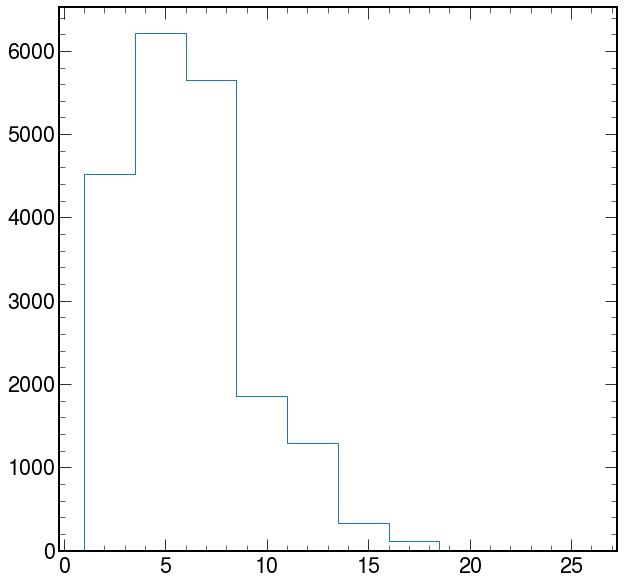

In [11]:
plt.hist([n_trk_orig, n_trk], histtype='step')

In [7]:
def dr(eta1,eta2,phi1,phi2):
    return np.sqrt((eta1-eta2)**2 + (phi1-phi2)**2)
def dr1d(eta1,eta2):
    return np.abs(eta1-eta2)

In [8]:
def eventDisplay(LCx, LCy, LCz, LCl, LCe, rechitx, rechity, rechitz, rechitL, rechitE, simhits, neg, pidx, multi_clus2d, matchPU):
    
    # Selections to be applied on collections
    if neg:  
        sel_LC = LCz<0
        sel_rechit = rechitz<0
    else:
        sel_LC = LCz>0
        sel_rechit = rechitz>0
        
        
    print('##### ---------------------- Tracktsers ---------------------- #####')

    fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(40,15))
    
    ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax0.set_ylabel('L', fontsize = 25, fontweight = 'bold')
    ax0.axhline(y=29, ls='--', color='black')
    
    ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax1.set_ylabel('L', fontsize = 25, fontweight = 'bold')
    ax1.axhline(y=29, ls='--', color='black')
    
    ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')
    
    ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')
    if neg: 
        ax3.axhline(y=-367.69904, ls='--', color='black')
        ax3.set_ylim([-320,-375])
    else:
        ax3.axhline(y=367.69904, ls='--', color='black')
        ax3.set_ylim([320,375])
    
    ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
    if neg: 
        ax4.axhline(y=-367.69904, ls='--', color='black')
        ax4.set_ylim([-320,-375])
    else:
        ax4.axhline(y=367.69904, ls='--', color='black')
        ax4.set_ylim([320,375])
    
    for i in pidx:
        
#         if not i in matchPU: continue
        
        print (multi_en[evt][i])
            
        if neg and LCz[multi_clus2d[i]].flatten()[0]>0: continue
        if not neg and LCz[multi_clus2d[i]].flatten()[0]<0: continue

        clusE = LCe[multi_clus2d[i]].flatten()
        clusX = LCx[multi_clus2d[i]].flatten()
        clusY = LCy[multi_clus2d[i]].flatten()
        clusZ = LCz[multi_clus2d[i]].flatten()
        clusL = LCl[multi_clus2d[i]].flatten()

        ax0.scatter(clusX,clusL,s=clusE*10)
        ax1.scatter(clusY,clusL,s=clusE*10)
        ax2.scatter(clusX,clusY,s=clusE*10)
        ax3.scatter(clusX,clusZ,s=clusE*10)
        ax4.scatter(clusY,clusZ,s=clusE*10)
        
#     ax0.set_xlim([40,80])
#     ax0.set_ylim([0,30])
#     ax1.set_xlim([20,54])
#     ax1.set_ylim([0,30])
#     ax2.set_xlim([46,76])
#     ax2.set_ylim([20,55])
#     ax3.set_xlim(ax3.get_xlim())
#     ax3.set_ylim(ax3.get_ylim())
#     ax4.set_xlim(ax4.get_xlim())
#     ax4.set_ylim(ax4.get_ylim())
   
    ax0_xlim = ax0.get_xlim()
    ax0_ylim = ax0.get_ylim()
    ax1_xlim = ax1.get_xlim()
    ax1_ylim = ax1.get_ylim()
    ax2_xlim = ax2.get_xlim()
    ax2_ylim = ax2.get_ylim()
    ax3_xlim = ax3.get_xlim()
    ax3_ylim = ax3.get_ylim()
    ax4_xlim = ax4.get_xlim()
    ax4_ylim = ax4.get_ylim()
    

    plt.show()
        
#     print('##### ---------------------- LCs and tracksters ---------------------- #####')

#     fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(40,15))
    
#     ax0.scatter(LCx[sel_LC],LCl[sel_LC],s=LCe[sel_LC]*10, c='black')
# #     ax0_xlim = ax0.get_xlim()
# #     ax0_ylim = ax0.get_ylim()
#     ax0.set_xlim(ax0_xlim)
#     ax0.set_ylim(ax0_ylim)
#     ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax0.set_ylabel('L', fontsize = 25, fontweight = 'bold')
#     ax0.axhline(y=29, ls='--', color='black')
    
#     ax1.scatter(LCy[sel_LC],LCl[sel_LC],s=LCe[sel_LC]*10, c='black')
# #     ax1_xlim = ax1.get_xlim()
# #     ax1_ylim = ax1.get_ylim()
#     ax1.set_xlim(ax1_xlim)
#     ax1.set_ylim(ax1_ylim)
#     ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax1.set_ylabel('L', fontsize = 25, fontweight = 'bold')
#     ax1.axhline(y=29, ls='--', color='black')
    
#     ax2.scatter(LCx[sel_LC],LCy[sel_LC],s=LCe[sel_LC]*10, c='black')
# #     ax2_xlim = ax2.get_xlim()
# #     ax2_ylim = ax2.get_ylim()
#     ax2.set_ylim(ax2.get_ylim())
#     ax2.set_xlim(ax2.get_xlim())
# #     ax2.set_xlim([-80,-55])
# #     ax2.set_ylim([-15,5])
#     ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')
    
#     ax3.scatter(LCx[sel_LC],LCz[sel_LC],s=LCe[sel_LC]*10, c='black')
#     if neg:
#         ax3.set_ylim([-320,-375])
#     else:
#         ax3.set_ylim([320,375])
#     ax3.set_xlim(ax3.get_xlim())
# #     ax3_xlim = ax3.get_xlim()
# #     ax3_ylim = ax3.get_ylim()
#     ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')
#     ax3.axhline(y=367.69904, ls='--', color='black')
#     ax3.axhline(y=-367.69904, ls='--', color='black')
    
#     ax4.scatter(LCy[sel_LC],LCz[sel_LC],s=LCe[sel_LC]*10, c='black')
#     if neg:
#         ax4.set_ylim([-320,-375])
#     else:
#         ax4.set_ylim([320,375])
#     ax4.set_xlim(ax4.get_xlim())
# #     ax4_xlim = ax4.get_xlim()
# #     ax4_ylim = ax4.get_ylim()
#     ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
#     ax4.axhline(y=367.69904, ls='--', color='black')
#     ax4.axhline(y=-367.69904, ls='--', color='black')
    
#     for i in pidx:
        
#         if not i in matchPU: continue
            
#         clusE = LCe[multi_clus2d[i]].flatten()
#         clusX = LCx[multi_clus2d[i]].flatten()
#         clusY = LCy[multi_clus2d[i]].flatten()
#         clusZ = LCz[multi_clus2d[i]].flatten()
#         clusL = LCl[multi_clus2d[i]].flatten()

#         ax0.scatter(clusX,clusL,s=clusE*10)
#         ax1.scatter(clusY,clusL,s=clusE*10)
#         ax2.scatter(clusX,clusY,s=clusE*10)
#         ax3.scatter(clusX,clusZ,s=clusE*10)
#         ax4.scatter(clusY,clusZ,s=clusE*10)

#     plt.show()

    
#     print('##### ---------------------- RecHits ---------------------- #####')
    
#     fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(40,15))
    
#     ax0.scatter(rechitx[sel_rechit],rechitL[sel_rechit],s=rechitE[sel_rechit]*10, c='tab:blue')
#     ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax0.set_ylabel('L', fontsize = 25, fontweight = 'bold')
#     ax0.set_xlim(ax0_xlim)
#     ax0.set_ylim(ax0_ylim)
    
#     ax1.scatter(rechity[sel_rechit],rechitL[sel_rechit],s=rechitE[sel_rechit]*10, c='tab:blue')
#     ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax1.set_ylabel('L', fontsize = 25, fontweight = 'bold')
#     ax1.set_xlim(ax1_xlim)
#     ax1.set_ylim(ax1_ylim)
    
#     ax2.scatter(rechitx[sel_rechit],rechity[sel_rechit],s=rechitE[sel_rechit]*10, c='tab:blue')
#     ax2.set_ylim(ax2.get_ylim())
#     ax2.set_xlim(ax2.get_xlim())
#     ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')
#     ax2.set_xlim(ax2_xlim)
#     ax2.set_ylim(ax2_ylim)
    
#     ax3.scatter(rechitx[sel_rechit],rechitz[sel_rechit],s=rechitE[sel_rechit]*10, c='tab:blue')
#     ax3.set_xlim(ax3_xlim)
#     ax3.set_ylim(ax3_ylim)
#     ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')
#     ax3.set_xlim(ax3_xlim)
#     ax3.set_ylim(ax3_ylim)
    
#     ax4.scatter(rechity[sel_rechit],rechitz[sel_rechit],s=rechitE[sel_rechit]*10, c='tab:blue')
#     ax4.set_xlim(ax4_xlim)
#     ax4.set_ylim(ax4_ylim)
#     ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
    
#     plt.show()

    
#     print('##### ---------------------- SimHits ---------------------- #####')
    
#     fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(40,15))
    
#     ax0.scatter(simhits[0],simhits[3],s=simhits[4]*10, c='tab:blue')
#     ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax0.set_ylabel('L', fontsize = 25, fontweight = 'bold')
# #     ax0.set_xlim(ax0_xlim)
# #     ax0.set_ylim(ax0_ylim)
    
#     ax1.scatter(simhits[1],simhits[3],s=simhits[4]*10, c='tab:blue')
#     ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax1.set_ylabel('L', fontsize = 25, fontweight = 'bold')
# #     ax1.set_xlim(ax1_xlim)
# #     ax1.set_ylim(ax1_ylim)
    
#     ax2.scatter(simhits[0],simhits[1],s=simhits[4]*10, c='tab:blue')
#     ax2.set_ylim(ax2.get_ylim())
#     ax2.set_xlim(ax2.get_xlim())
#     ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')
# #     ax2.set_xlim(ax2_xlim)
# #     ax2.set_ylim(ax2_ylim)
    
#     ax3.scatter(simhits[0],simhits[2],s=simhits[4]*10, c='tab:blue')
#     ax3.set_xlim(ax3_xlim)
#     ax3.set_ylim(ax3_ylim)
#     ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')
# #     ax3.set_xlim(ax3_xlim)
# #     ax3.set_ylim(ax3_ylim)
    
#     ax4.scatter(simhits[1],simhits[2],s=simhits[4]*10, c='tab:blue')
#     ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
# #     ax4.set_xlim(ax4_xlim)
# #     ax4.set_ylim(ax4_ylim)
    
#     plt.show()
    
    print('##### ---------------------- forShamik ---------------------- #####')

    fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(40,15), dpi=150)
    
    ax0.scatter(simhits[0],simhits[3],s=simhits[4]*10, c='black')
    ax0.set_xlim(ax0.get_xlim())
    ax0.set_ylim(ax0.get_ylim())
    ax0.scatter(rechitx[sel_rechit],rechitL[sel_rechit],s=rechitE[sel_rechit]*10, c='lightgray', alpha=0.9)
    ax0.scatter(simhits[0],simhits[3],s=simhits[4]*10, c='black')
    ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax0.set_ylabel('L', fontsize = 25, fontweight = 'bold')
    
    ax1.scatter(simhits[1],simhits[3],s=simhits[4]*10, c='black')
    ax1.set_xlim(ax1.get_xlim())
    ax1.set_ylim(ax1.get_ylim())
    ax1.scatter(rechity[sel_rechit],rechitL[sel_rechit],s=rechitE[sel_rechit]*10, c='lightgray', alpha=0.9)
    ax1.scatter(simhits[1],simhits[3],s=simhits[4]*10, c='black')
    ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax1.set_ylabel('L', fontsize = 25, fontweight = 'bold')
    
    #sel_l is to remove hits over the layer reported in x-L and y-L views 
    sel_l = simhits[3]<ax1.get_ylim()[1]
    ax2.scatter(simhits[0][sel_l],simhits[1][sel_l],s=simhits[4][sel_l]*10, c='black')
    ax2.set_xlim(ax2.get_xlim())
    ax2.set_ylim(ax2.get_ylim())
    sel_l = rechitL<ax1.get_ylim()[1]
    ax2.scatter(rechitx[sel_rechit & sel_l],rechity[sel_rechit & sel_l],s=rechitE[sel_rechit & sel_l]*10, c='lightgray', alpha=0.9)
    sel_l = simhits[3]<ax1.get_ylim()[1]
    ax2.scatter(simhits[0][sel_l],simhits[1][sel_l],s=simhits[4][sel_l]*10, c='black')
    ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')
    ax2.set_title('Hits below layers '+str(int(ax1.get_ylim()[1])), fontsize = 25, fontstyle = 'italic')
    
    ax3.scatter(simhits[0],simhits[2],s=simhits[4]*10, c='black')
    ax3.set_xlim(ax3.get_xlim())
    ax3.set_ylim(ax3.get_ylim())
    ax3.scatter(rechitx[sel_rechit],rechitz[sel_rechit],s=rechitE[sel_rechit]*10, c='lightgray', alpha=0.9)
    ax3.scatter(simhits[0],simhits[2],s=simhits[4]*10, c='black')
    ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')
    
    ax4.scatter(simhits[1],simhits[2],s=simhits[4]*10, c='black')
    ax4.set_xlim(ax4.get_xlim())
    ax4.set_ylim(ax4.get_ylim())
    ax4.scatter(rechity[sel_rechit],rechitz[sel_rechit],s=rechitE[sel_rechit]*10, c='lightgray', alpha=0.9)
    ax4.scatter(simhits[1],simhits[2],s=simhits[4]*10, c='black')
    ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
    
    for i in pidx:
        
#         if not i in matchPU: continue
            
        if neg and LCz[multi_clus2d[i]].flatten()[0]>0: continue
        if not neg and LCz[multi_clus2d[i]].flatten()[0]<0: continue

        clusE = LCe[multi_clus2d[i]].flatten()
        clusX = LCx[multi_clus2d[i]].flatten()
        clusY = LCy[multi_clus2d[i]].flatten()
        clusZ = LCz[multi_clus2d[i]].flatten()
        clusL = LCl[multi_clus2d[i]].flatten()

        ax0.scatter(clusX,clusL,s=clusE*10,alpha=0.5)
        ax1.scatter(clusY,clusL,s=clusE*10,alpha=0.5)
        ax2.scatter(clusX,clusY,s=clusE*10,alpha=0.5)
        ax3.scatter(clusX,clusZ,s=clusE*10,alpha=0.5)
        ax4.scatter(clusY,clusZ,s=clusE*10,alpha=0.5)
    
    plt.savefig('event.png', facecolor='white', dpi=300, bbox_inches='tight')
    plt.show()


In [9]:
def genMatching():
    matched = []
    sign = []
    for sim in range(2):
        simidxpos = sim_indices[evt][calo_simclusidx[evt][sim]]
        simidxpos = np.unique(simidxpos.flatten())

        multiidxs = []
        
        for j in range(len(gun_eta[evt])):
            gsign = gun_eta[evt][j][0]
            if gsign*sim_eta[evt][calo_simclusidx[evt][sim][0]] < 0:
                continue

            for i in range(len(multi_clus2d[evt])):
                if (dr1d(multi_eta[evt][i],gun_eta[evt][0][j]) < 0.09) and (dr1d(multi_phi[evt][i],gun_phi[evt][0][j]) < 0.3) : 
                       multiidxs.append(i)
        print(multiidxs)

        simrechits = np.stack((rechit_x[evt][simidxpos],rechit_y[evt][simidxpos],rechit_z[evt][simidxpos],rechit_energy[evt][simidxpos]),axis=0).T
        for trkidx in multiidxs:
            clusrechits = np.stack((rechit_x[evt][clus_rechits[evt][multi_clus2d[evt][trkidx]].flatten()],
                           rechit_y[evt][clus_rechits[evt][multi_clus2d[evt][trkidx]].flatten()],
                            rechit_z[evt][clus_rechits[evt][multi_clus2d[evt][trkidx]].flatten()],
                           rechit_energy[evt][clus_rechits[evt][multi_clus2d[evt][trkidx]].flatten()] 
                           ),axis=0).T


            commonrows = np.array([x for x in set([tuple(x) for x in clusrechits]) & set([tuple(x) for x in simrechits])])
            #print("common / totalsim :", len(commonrows),len(simrechits))

            #if len(commonrows) < 0.01*len(simrechits):
            if len(commonrows) < 10:
                continue
            matched.append(trkidx)
            sign.append(np.sign(rechit_z[evt][clus_rechits[evt][multi_clus2d[evt][trkidx]].flatten()][0]))
    return matched, sign


[]
[5, 6, 7]
################################### Positive Eta ###################################
gunEta = 2.5636163
gunPhi = 0.6762999
gunEn = 539.8498
Number of tracksters: 3
Number of gen matched tracksters: 3
Number of calo particles: 19
##### ---------------------- Tracktsers ---------------------- #####
492.1182
3.8349612
6.009545


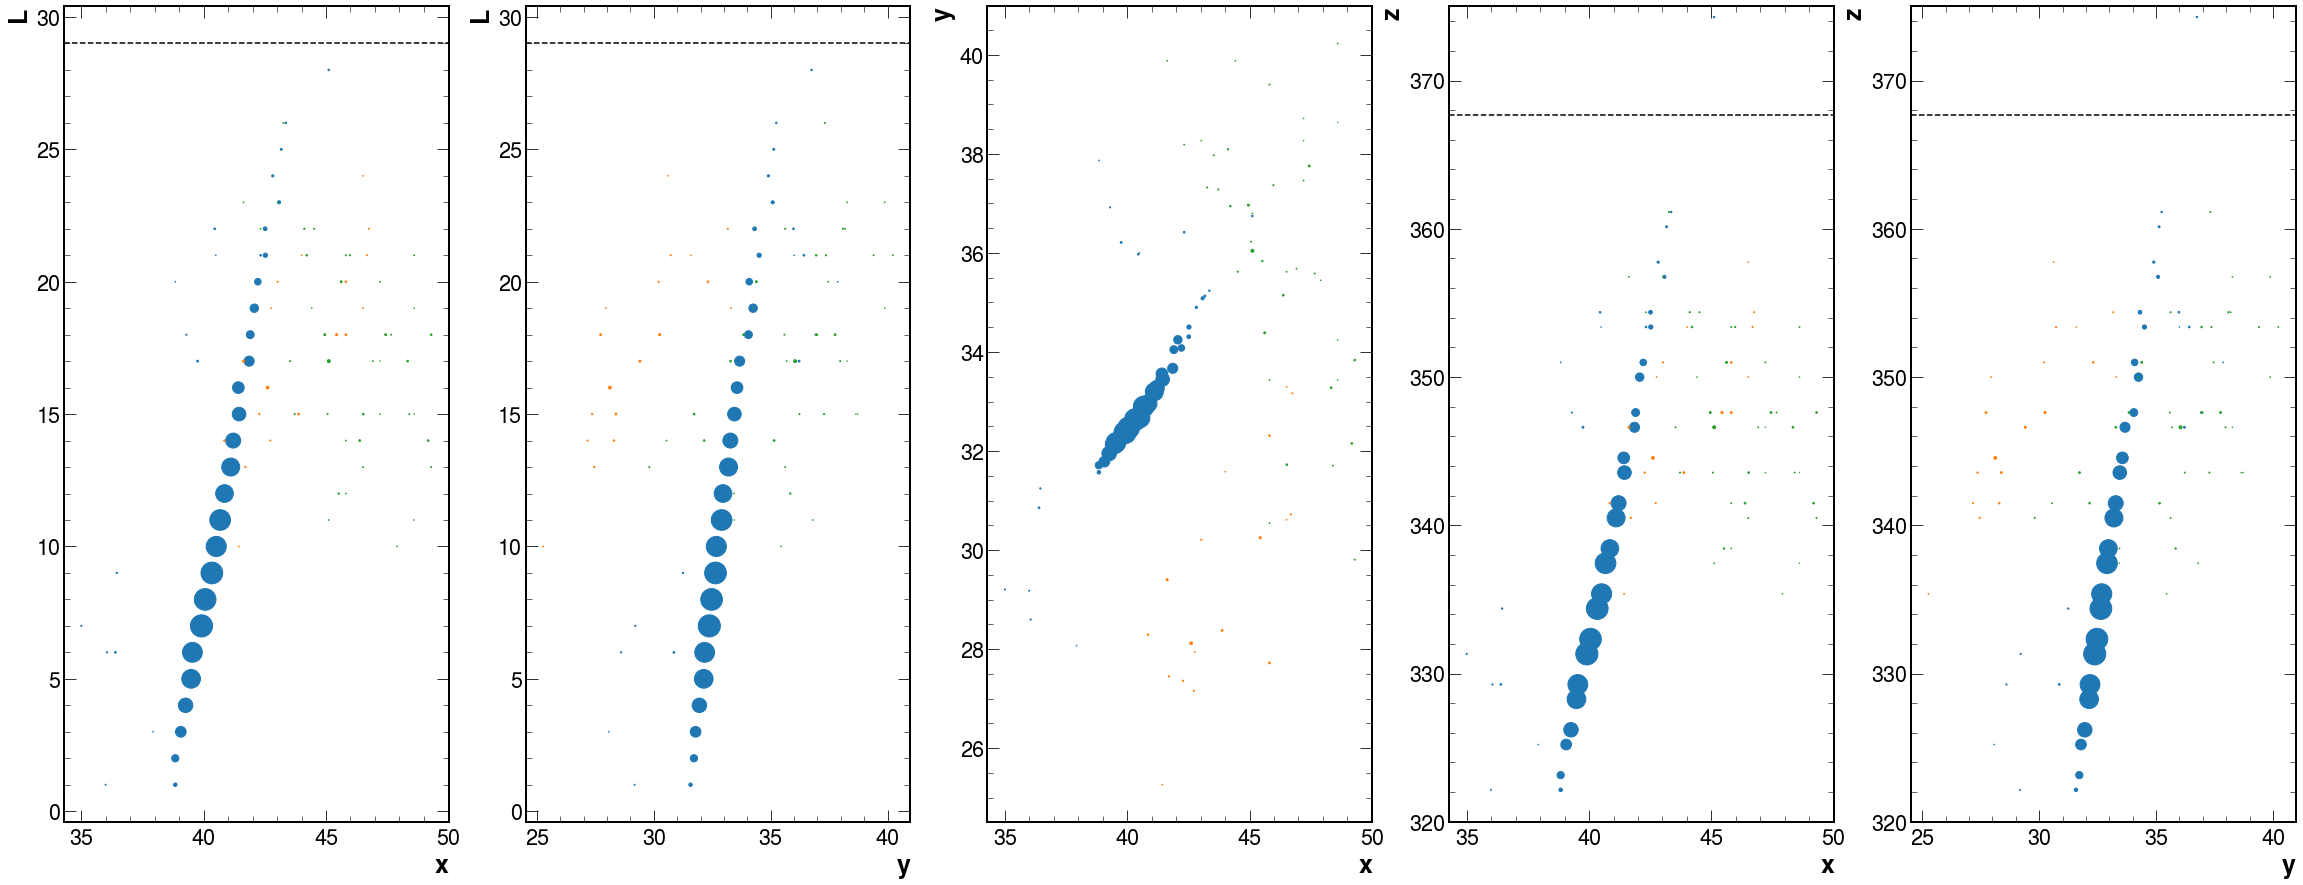

##### ---------------------- forShamik ---------------------- #####


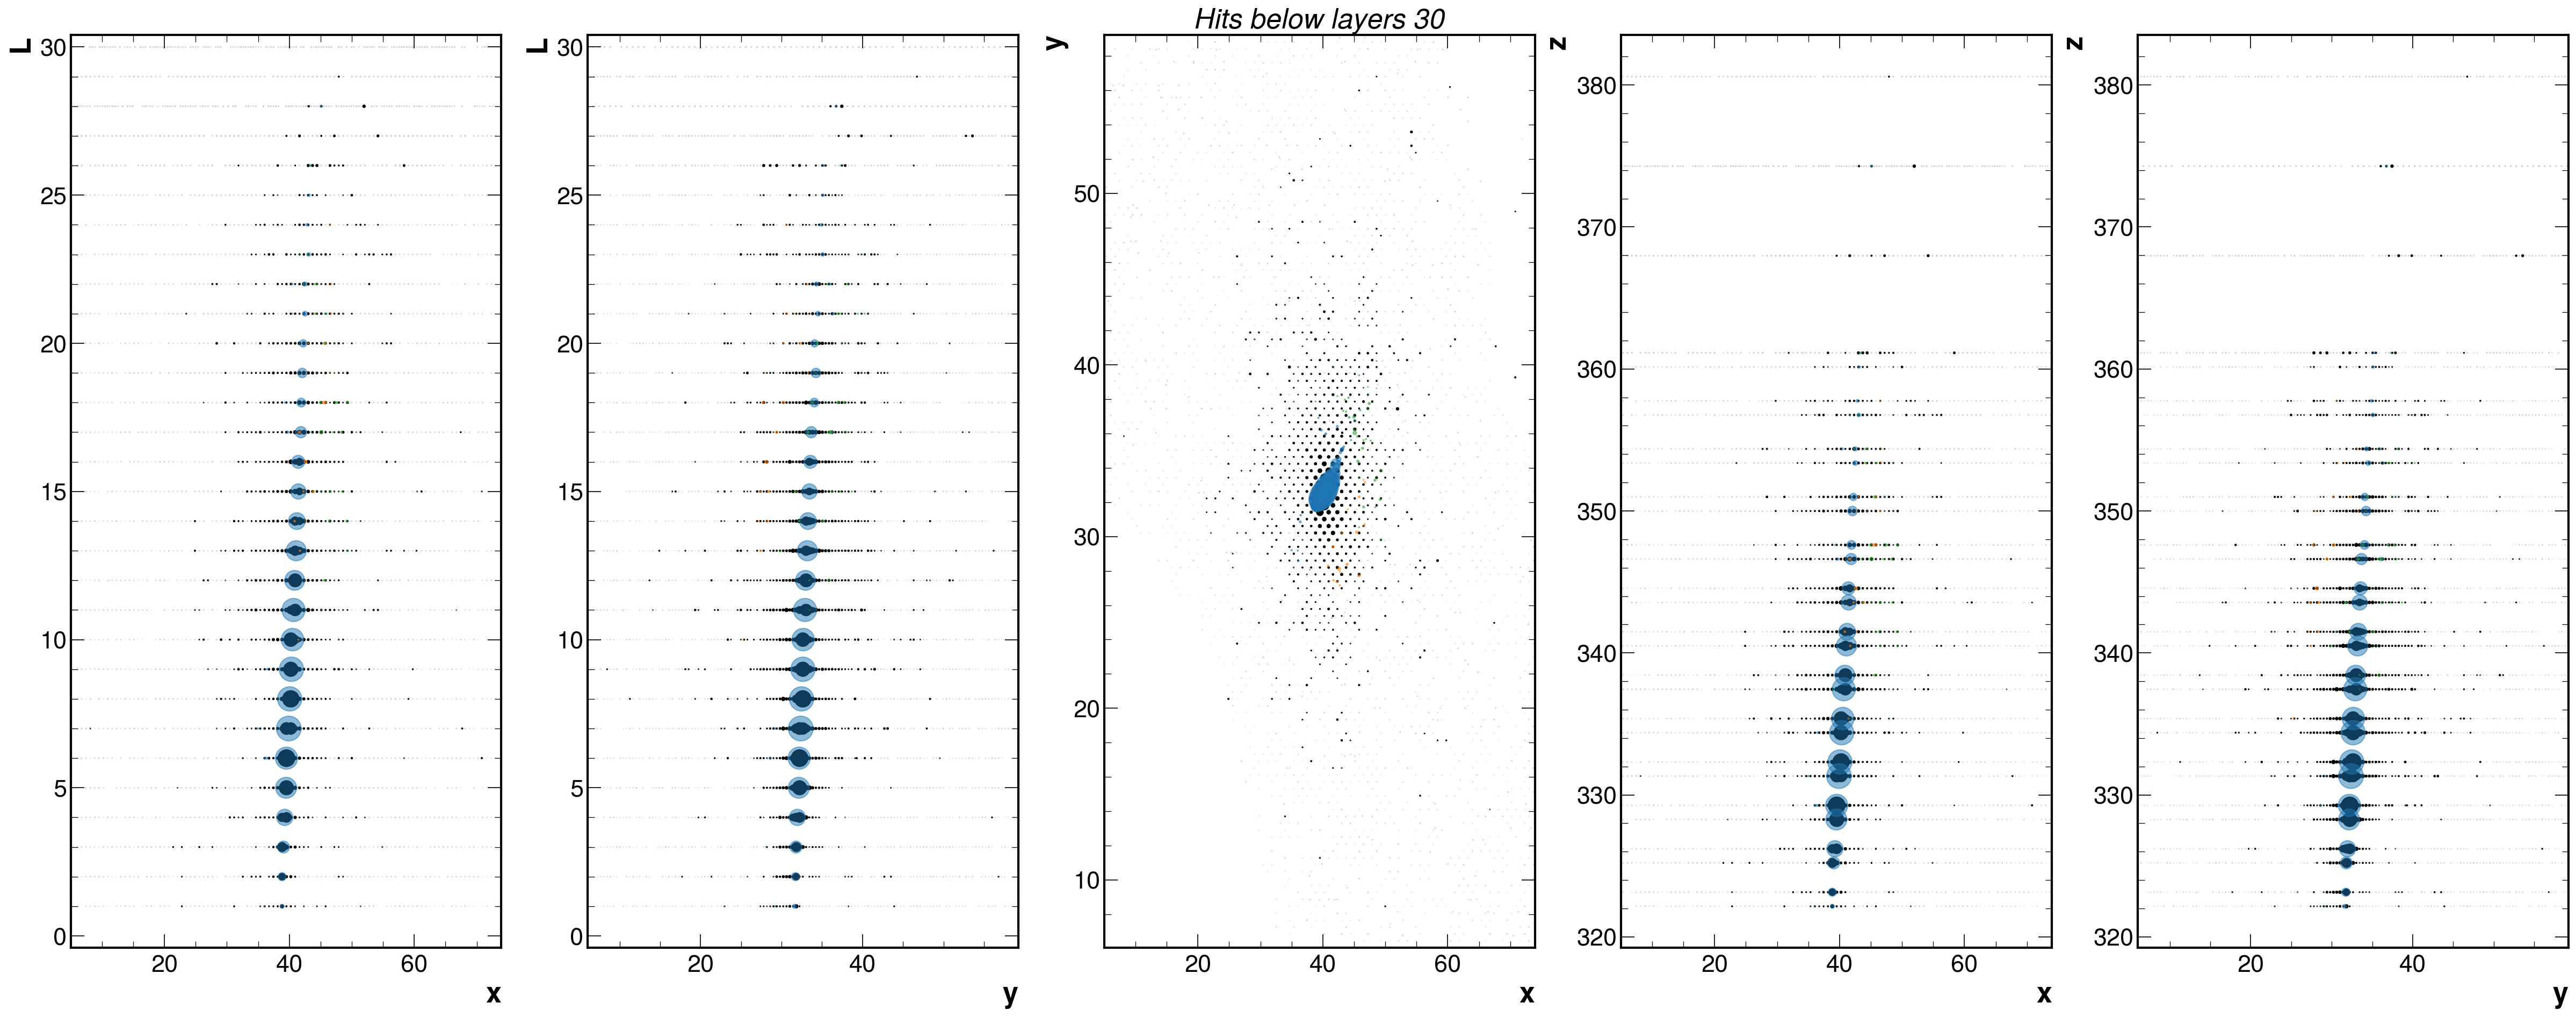

################################### Negative Eta ###################################
gunEta = -2.5636163
gunPhi = -2.4652927
gunEn = 539.8498
Number of tracksters: 6
Number of gen matched tracksters: 0
Number of calo particles: 10
##### ---------------------- Tracktsers ---------------------- #####
0.98294365
1.8372014
1.8531535
5.2275033
4.1406803
490.2934


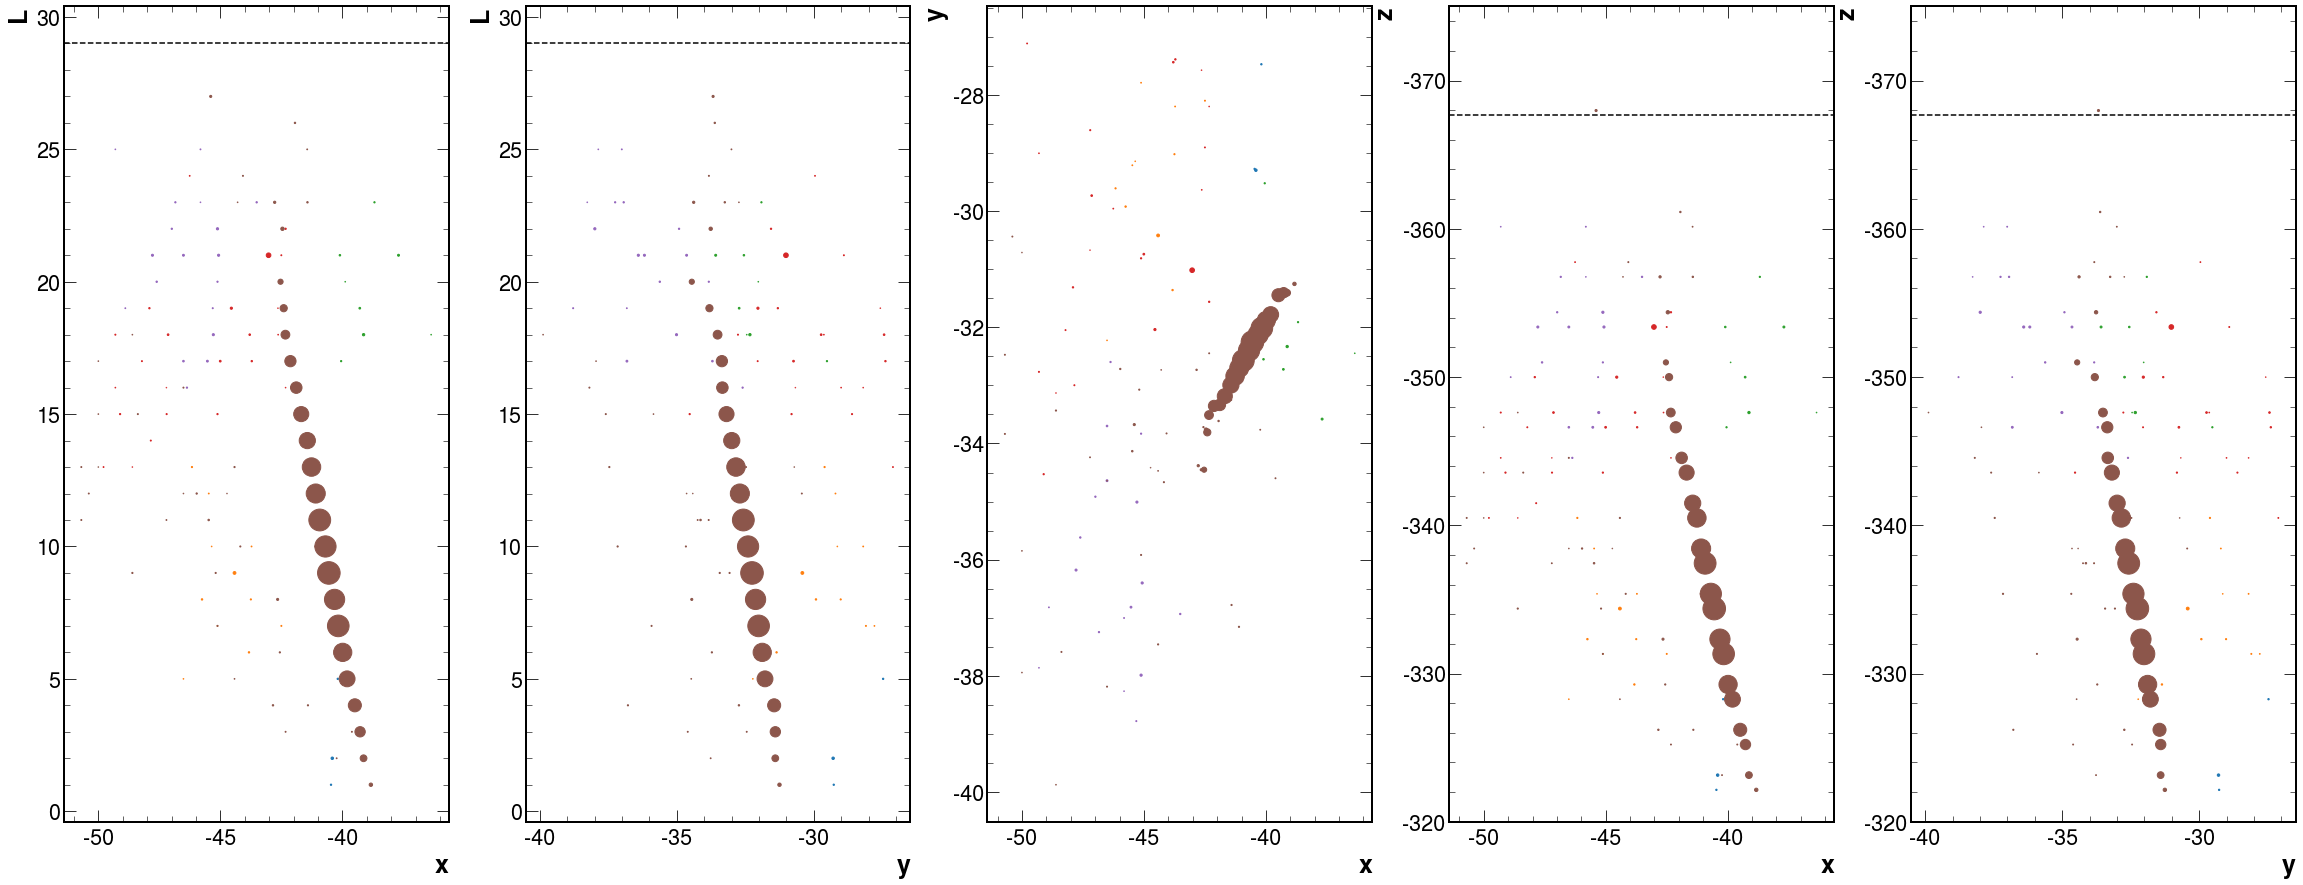

##### ---------------------- forShamik ---------------------- #####


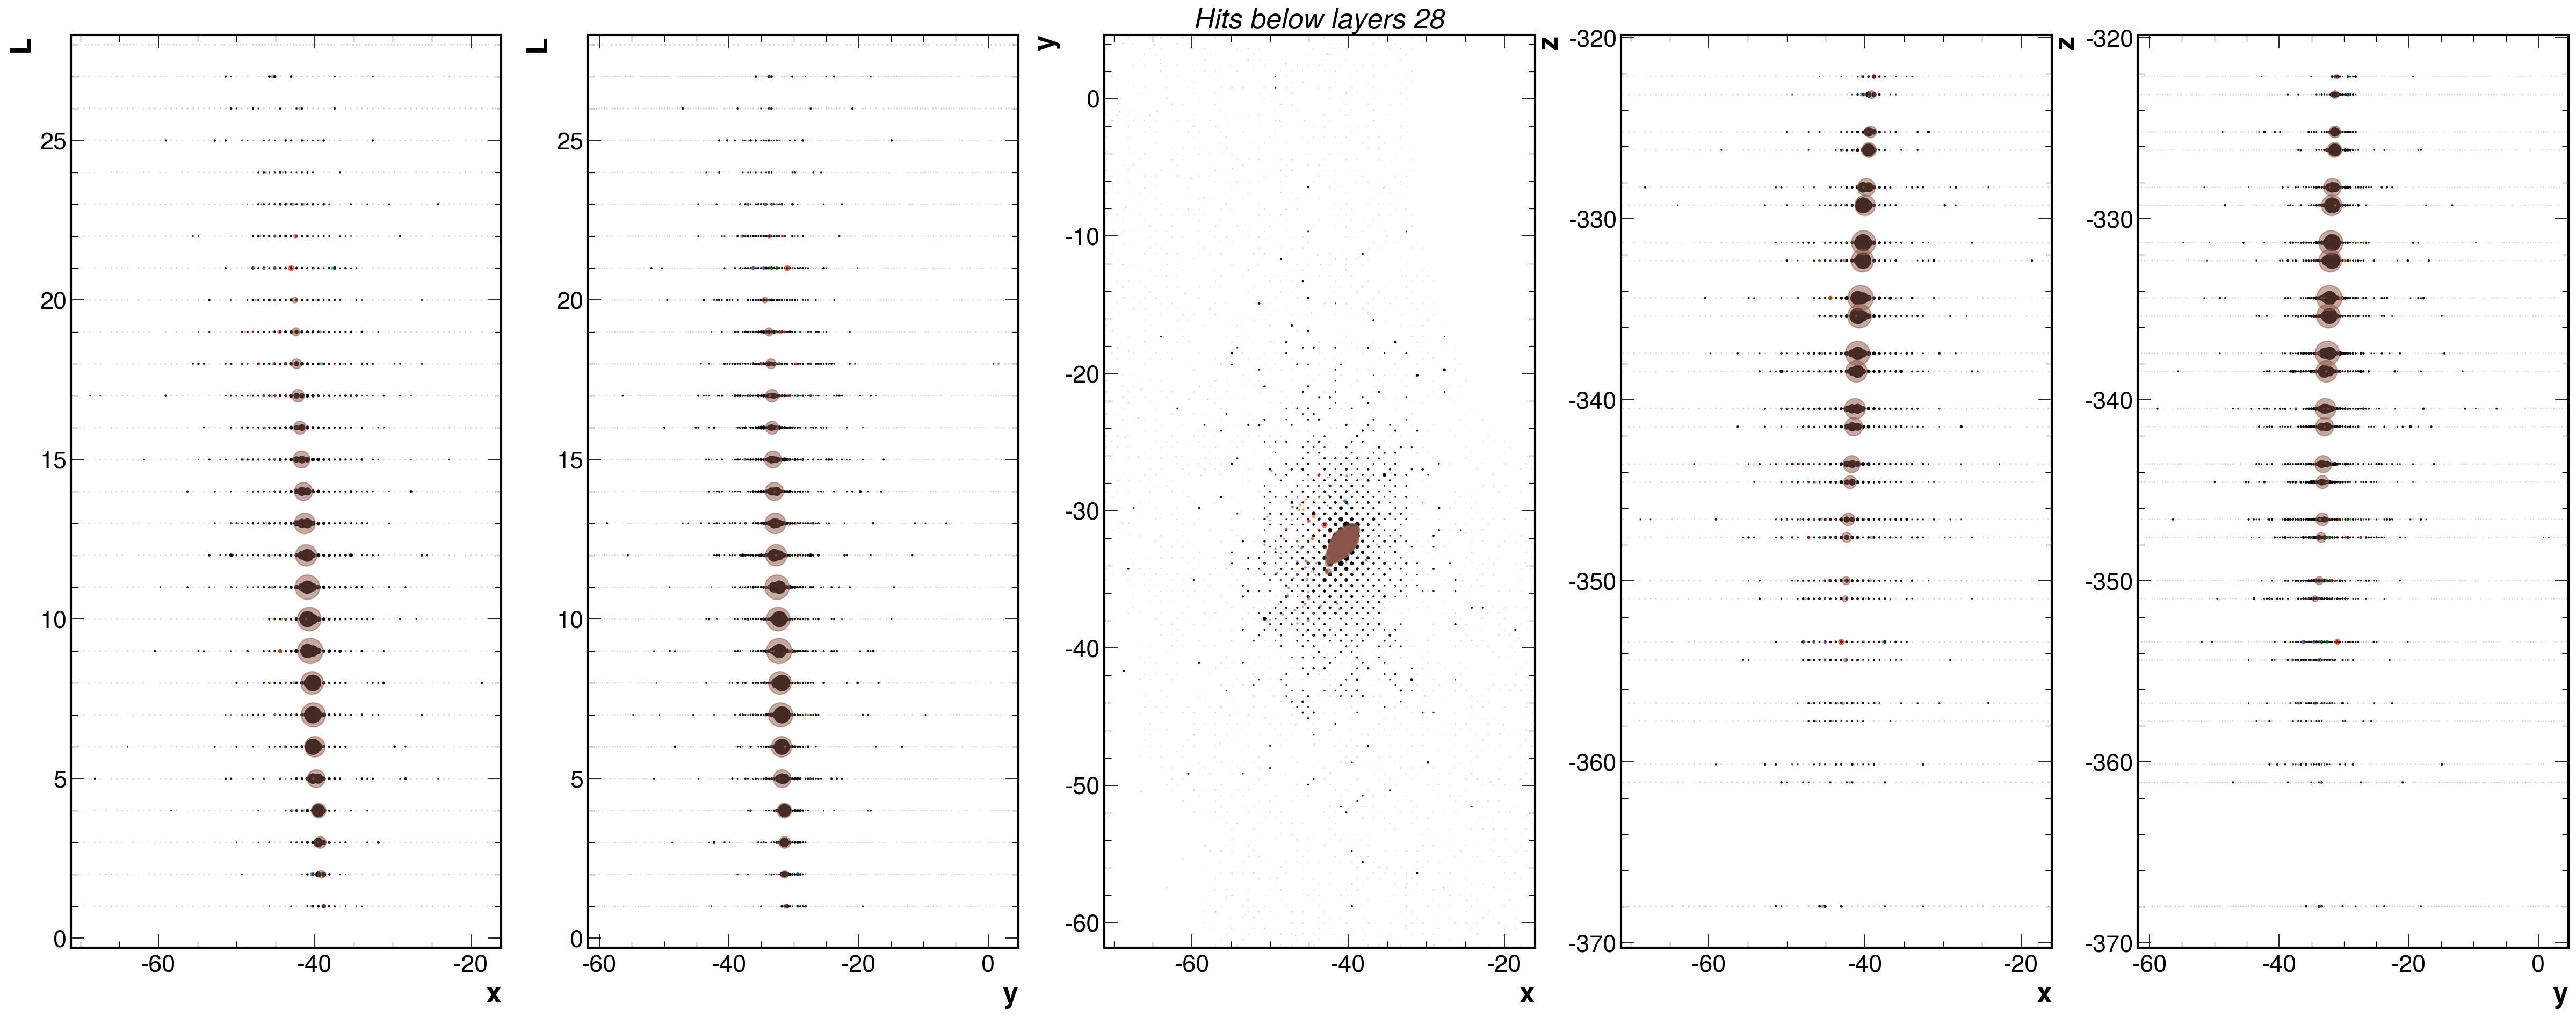

In [41]:
evt = 0

posidx = [] ### for positive z LCs
negidx = [] ### for negative z LCs
for i in range(len(multi_clus2d[evt])): #Loop over number of LCs and check if the eta is positive or negative
    if multi_eta[evt][i] > 0:
        posidx.append(i)
    else:
        negidx.append(i)
        
# Gen-matching for PU environment 
genMatched, genSign = genMatching()
genSign = np.array(genSign)


print('################################### Positive Eta ###################################')
print('gunEta =', gun_eta[evt][0][0])
print('gunPhi =', gun_phi[evt][0][0])
print('gunEn =', gun_en[evt][0][0])
print('Number of tracksters:', len(posidx))
print('Number of gen matched tracksters:', len(genSign[genSign>0]))
print('Number of calo particles:', len(calo_simclusidx[evt][1]))

simidxpos = sim_indices[evt][calo_simclusidx[evt][1]]
simidxpos = np.unique(simidxpos.flatten())
simrechits = np.stack((rechit_x[evt][simidxpos],rechit_y[evt][simidxpos],rechit_z[evt][simidxpos],rechit_layer[evt][simidxpos],rechit_energy[evt][simidxpos]),axis=0)

eventDisplay(clus_x[evt], clus_y[evt], clus_z[evt], clus_l[evt], clus_en[evt],
             rechit_x[evt], rechit_y[evt], rechit_z[evt], rechit_layer[evt], rechit_energy[evt],
             simrechits,
             False, posidx, multi_clus2d[evt], genMatched)


print('################################### Negative Eta ###################################')
print('gunEta =', gun_eta[evt][0][1])
print('gunPhi =', gun_phi[evt][0][1])
print('gunEn =', gun_en[evt][0][1])
print('Number of tracksters:', len(negidx))
print('Number of gen matched tracksters:', len(genSign[genSign<0]))
print('Number of calo particles:', len(calo_simclusidx[evt][0]))

simidxpos = sim_indices[evt][calo_simclusidx[evt][0]]
simidxpos = np.unique(simidxpos.flatten())
simrechits = np.stack((rechit_x[evt][simidxpos], rechit_y[evt][simidxpos], rechit_z[evt][simidxpos], rechit_layer[evt][simidxpos], rechit_energy[evt][simidxpos]),axis=0)

eventDisplay(clus_x[evt], clus_y[evt], clus_z[evt], clus_l[evt], clus_en[evt], 
             rechit_x[evt], rechit_y[evt], rechit_z[evt], rechit_layer[evt], rechit_energy[evt],
             simrechits,
             True, negidx, multi_clus2d[evt], genMatched)
